<a href="https://colab.research.google.com/github/tumble-weed/mahendran_inversion/blob/master/inversion_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -I --no-cache-dir pillow

     |████████████████████████████████| 2.1MB 2.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import skimage.io
from PIL import Image

In [3]:
!git clone https://github.com/tumble-weed/mahendran_inversion.git

Cloning into 'mahendran_inversion'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 3), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [4]:
%cd mahendran_inversion

/content/mahendran_inversion


In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19KH8xQZsyiX-4OXK5F7rFKTWwNWnRDxf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19KH8xQZsyiX-4OXK5F7rFKTWwNWnRDxf" -O images.zip && rm -rf /tmp/cookies.txt
!unzip -n images.zip

--2019-08-07 13:11:11--  https://docs.google.com/uc?export=download&confirm=&id=19KH8xQZsyiX-4OXK5F7rFKTWwNWnRDxf
Resolving docs.google.com (docs.google.com)... 64.233.188.100, 64.233.188.139, 64.233.188.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6daubqoj9btqg46b4uf455rgb3irbdgm/1565179200000/10570413806168058073/*/19KH8xQZsyiX-4OXK5F7rFKTWwNWnRDxf?e=download [following]
--2019-08-07 13:11:13--  https://doc-0g-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6daubqoj9btqg46b4uf455rgb3irbdgm/1565179200000/10570413806168058073/*/19KH8xQZsyiX-4OXK5F7rFKTWwNWnRDxf?e=download
Resolving doc-0g-74-docs.googleusercontent.com (doc-0g-74-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-74-docs.googleusercontent.com (do

In [0]:
from api import get_model,prepare_for_inversion,invert

In [7]:
modelname = 'resnet18'
model, model_imsize, preprocess,denormalize = get_model('alexnet')

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:02<00:00, 118559500.64it/s]


In [0]:
name_to_invert = 'avgpool'
layer_to_invert,hyperparams = prepare_for_inversion(modelname,model,name_to_invert)

In [0]:
im = skimage.io.imread('images-master/ILSVRC2012_val_00000013.JPEG')
im_pil = Image.fromarray(im)
ref = preprocess(im_pil).unsqueeze(0)
ref= ref.cuda()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

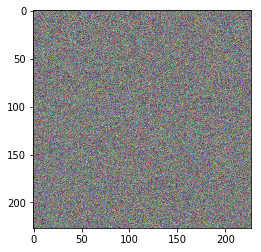

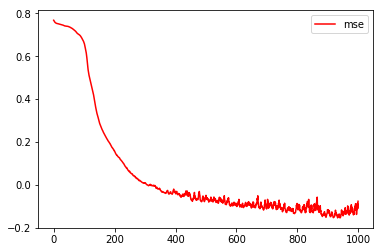

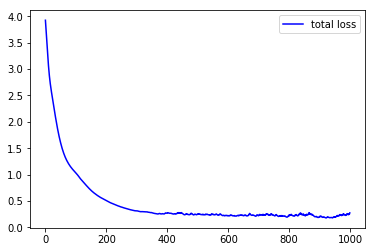

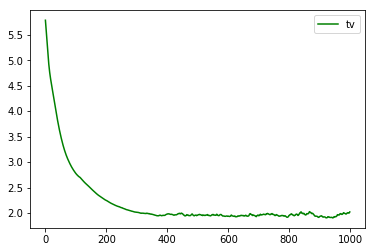

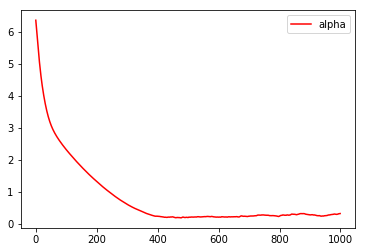

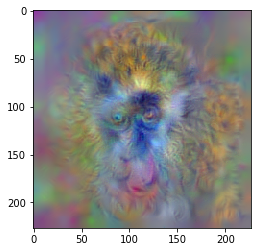

In [10]:
invert(ref,hyperparams,model,layer_to_invert)